First 5 rows of dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Target Names: ['setosa' 'versicolor' 'virginica']


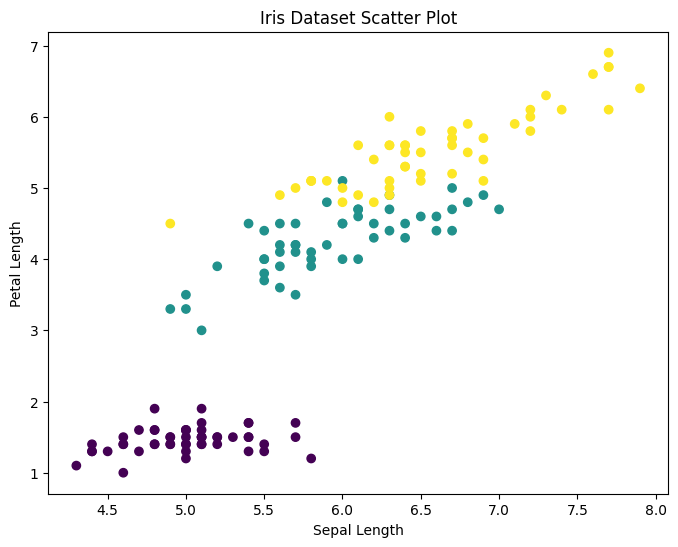

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
⬇️ Move the sliders below and see the prediction live:


Output()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import ipywidgets as widgets
from IPython.display import display

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
target_names = iris.target_names

print("First 5 rows of dataset:")
display(X.head())

print("Target Names:", target_names)

plt.figure(figsize=(8,6))
plt.scatter(X['sepal length (cm)'], X['petal length (cm)'], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris Dataset Scatter Plot')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

with open("iris_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("iris_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                          columns=X.columns)

    prediction = loaded_model.predict(input_data)[0]
    print(f"🌸 Predicted Iris Species: **{target_names[prediction].capitalize()}**")

sl = widgets.FloatSlider(min=4.0, max=8.0, step=0.1, description='Sepal Length')
sw = widgets.FloatSlider(min=2.0, max=4.5, step=0.1, description='Sepal Width')
pl = widgets.FloatSlider(min=1.0, max=7.0, step=0.1, description='Petal Length')
pw = widgets.FloatSlider(min=0.1, max=2.5, step=0.1, description='Petal Width')

ui = widgets.VBox([sl, sw, pl, pw])
out = widgets.interactive_output(predict_iris, {'sepal_length': sl, 'sepal_width': sw, 'petal_length': pl, 'petal_width': pw})

print("⬇️ Move the sliders below and see the prediction live:")
display(ui, out)
